# SKLearn Decision Tree

In this project, we will classify our data with the Decision Tree technique using the iris dataset, one of the most popular datasets often used for machine learning.

Decision tree is one of the supervised learning algorithms that can be used for classification and regression problems. Decision tree is a powerful algorithm that can be used in complex problems. It is also the main building block of the Random Forest algorithm, which is one of the most powerful algorithms today.

Decision trees predict a class (classification) or a value (regression) based on rules formed after studying the data.

# Import Library

In [4]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.6 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 6.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 6.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 6.8 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 8.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/10.6 MB 7.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.3/10.6 MB 8.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 8.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 8.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 8.6 MB/s eta 0:00:01
   ---

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Load Data

The iris dataset consists of 4 attributes: sepal length, sepal width, petal length, and petal width. There are 3 target classes in this dataset. This data is used for classification problems, where we predict the species type of a flower based on the given attributes.

In [7]:
# Read iris.csv file
iris = pd.read_csv('../data/Iris.csv')

In [8]:
# View dataset information on the first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# View dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Preparation

we can identify an unimportant column in the dataset which is the "Id" column. To remove the column, use the drop() function.

In [10]:
# Drop Id colulm
iris.drop('Id',axis=1,inplace=True)

We also need to split the dataset into training and test data.

In [11]:
# split attributes and labels
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

**Visualize the Data**

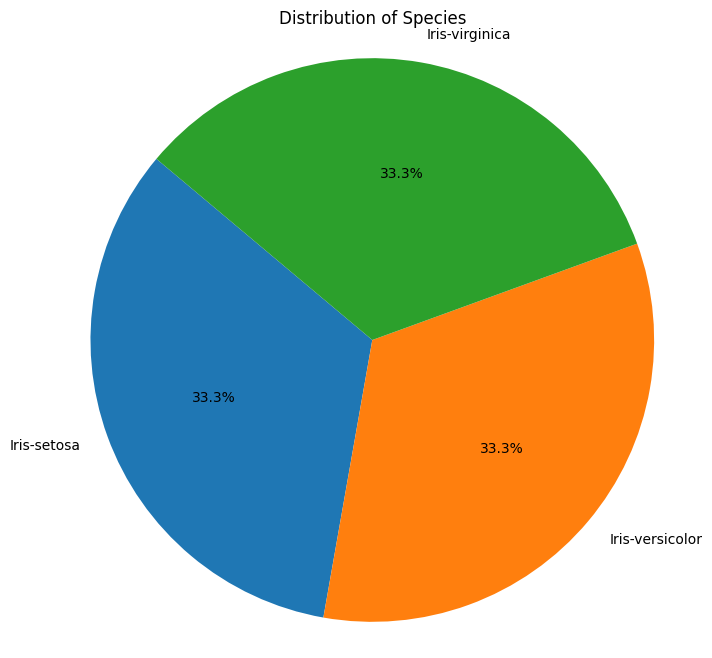

In [12]:
# @title Pie Chart

species_counts = iris["Species"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Species')
plt.show()


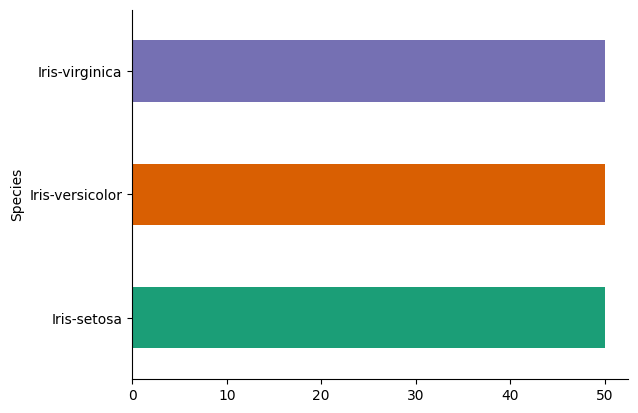

In [13]:
# @title Species

iris.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\ARDAN\AppData\Local\Temp\ipykernel_1628\1458017918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')


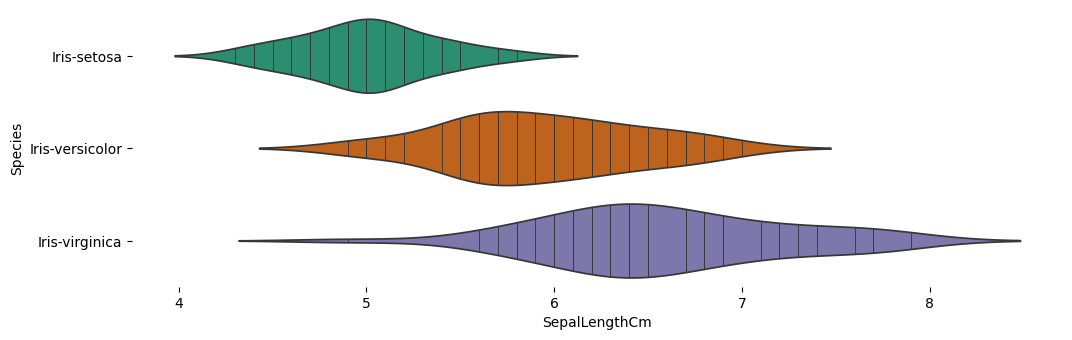

In [14]:
# @title Species vs SepalLengthCm

figsize = (12, 1.2 * len(iris['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\ARDAN\AppData\Local\Temp\ipykernel_1628\484709211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='SepalWidthCm', y='Species', inner='stick', palette='Dark2')


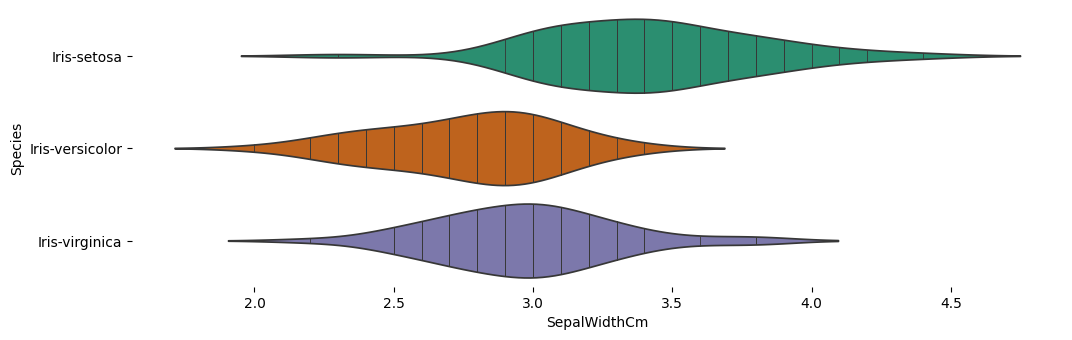

In [15]:
# @title Species vs SepalWidthCm

figsize = (12, 1.2 * len(iris['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='SepalWidthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\ARDAN\AppData\Local\Temp\ipykernel_1628\854165426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')


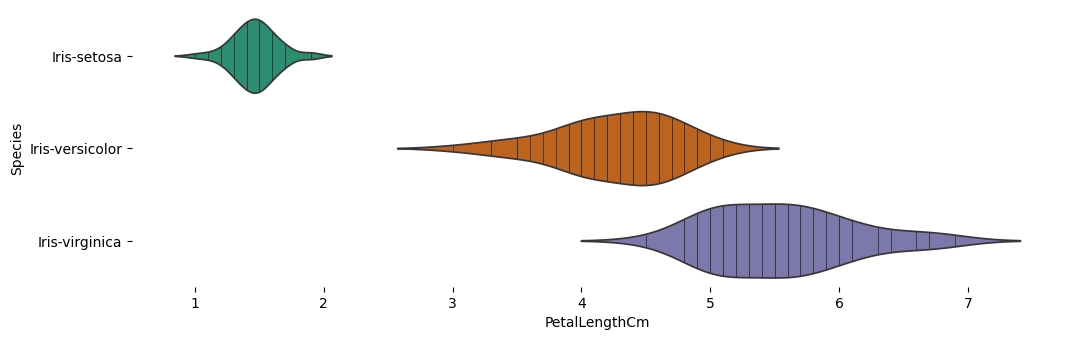

In [16]:
# @title Species vs PetalLengthCm

figsize = (12, 1.2 * len(iris['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\ARDAN\AppData\Local\Temp\ipykernel_1628\2459730494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='PetalWidthCm', y='Species', inner='stick', palette='Dark2')


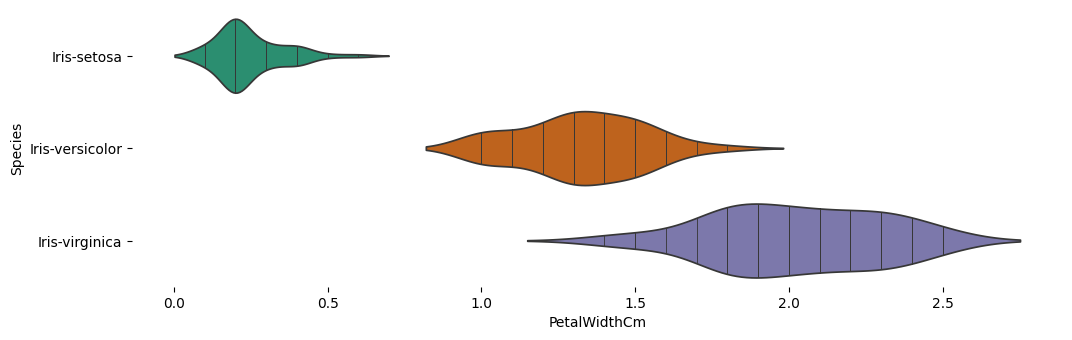

In [17]:
# @title Species vs PetalWidthCm

figsize = (12, 1.2 * len(iris['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='PetalWidthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Model Building

Next, define the decision tree model that we will use

In [18]:
# Build decision tree model
tree_model = DecisionTreeClassifier()

# Cross Validation

K-Fold Cross Validation or more commonly called cross validation is one of the popular techniques used in ML model evaluation. In cross validation, the dataset is divided into K folds. In each iteration, each fold will be used once as test data and the remaining folds are used as training data. By using cross validation we will get more accurate evaluation results because the model is evaluated with all the data.

Once the dataset and model are ready, we can use cross validation to evaluate the performance of the machine learning model. The cross_val_score() function as below accepts 4 parameters, namely, 'tree_model' which is the machine learning model, 'X' which is the attribute of the dataset, 'y' which is the label of the dataset, and 'cv' which is the number of folds to be used in cross validation.

In [23]:
scores = cross_val_score(tree_model, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

Cross_val_score returns an array consisting of the testing accuracy of each fold of the dataset. The first element of the array shows a value of 0.96666 which means that when the first fold is used as the validation set and the other folds are used as the train set, the result of the test is an accuracy of 0.96666.

Seeing the accuracy of all fold tests that have high and consistent values in each fold, we get the idea that our model has very good performance.

In general, if the results of testing each fold in cross validation have values that vary from 0.85 to 0.99, then the model can be said to be good.

# Training

Then, train the model using the training data using the fit() function.

In [19]:
# perform model training on the data
tree_model = tree_model.fit(X_train, y_train)

# Evaluation

After the model is trained, test the model using test data to see how good the model we have created is. This model testing can be done using the predict() function.

Next, use the accuracy metric to see how good the model we have trained is.

In [20]:
# Model Evaluation

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)


Accuracy:  0.933


# Prediction

In the following example, we want to predict the species of an iris flower that has a sepal length of 6.2 centimeters, sepal width of 3.4 centimeters, petal length of 5.4 centimeters, and petal width of 2.3 centimeters.

In [24]:
# model prediction with tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


c:\Users\ARDAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In addition to making predictions, we can also see the visualization of the decision tree we made on the data using the Graphviz library. The result of graphviz is a dot file that will appear in the file folder on the left panel of Google Colab (if you are using Google Colab).

In [26]:
export_graphviz(
    tree_model,
    out_file = "../output/iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

The following are the visualization results of the decision tree model that we have used:
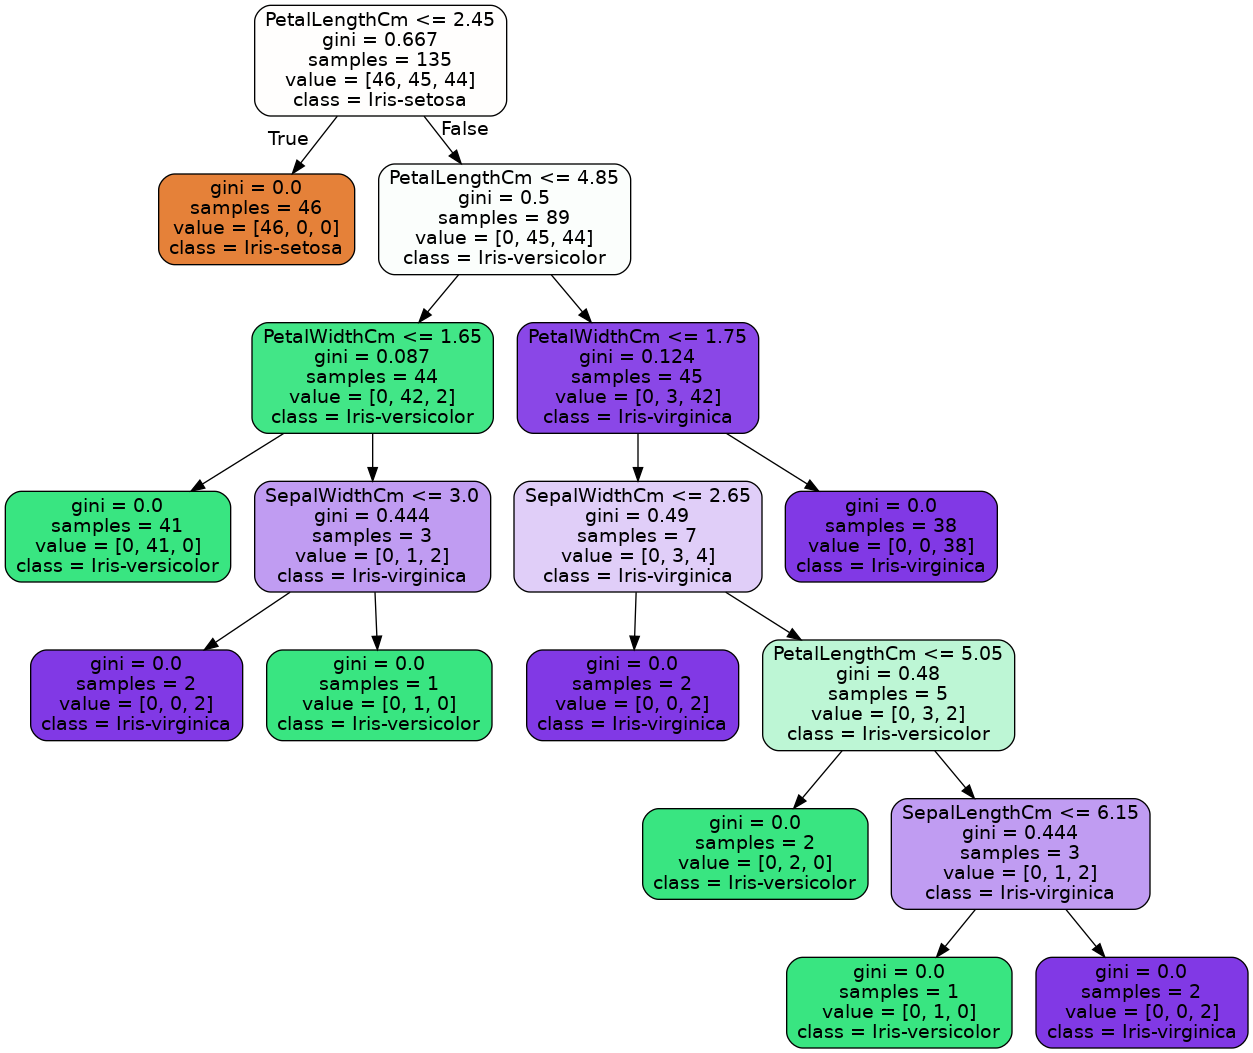